<a href="https://colab.research.google.com/github/GitMarco27/coder_retriever/blob/main/examples/notebooks/digit_mnist_0_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install coder_retriever -U -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.9 MB/s eta 0:00:00


In [2]:
import coder_retriever as cr
import tensorflow as tf

In [3]:
assistant = cr.ai.assistant.AiAssistant(openai_api_key="")

In [4]:
query = """

- Load the digit mnist dataset from tensorflow datasets and covert it to X (images) and Y (labels) as numpy arrays

"""
assistant.run_code(query, _vars=vars())

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


"import tensorflow_datasets as tfds\nimport numpy as np\n\n# Load the mnist dataset\nmnist_dataset = tfds.load('mnist', split='train')\n\n# Convert the dataset to numpy arrays\nX = []\nY = []\nfor example in mnist_dataset:\n    image = example['image'].numpy()\n    label = example['label'].numpy()\n    X.append(image)\n    Y.append(label)\n\nX = np.array(X)\nY = np.array(Y)"

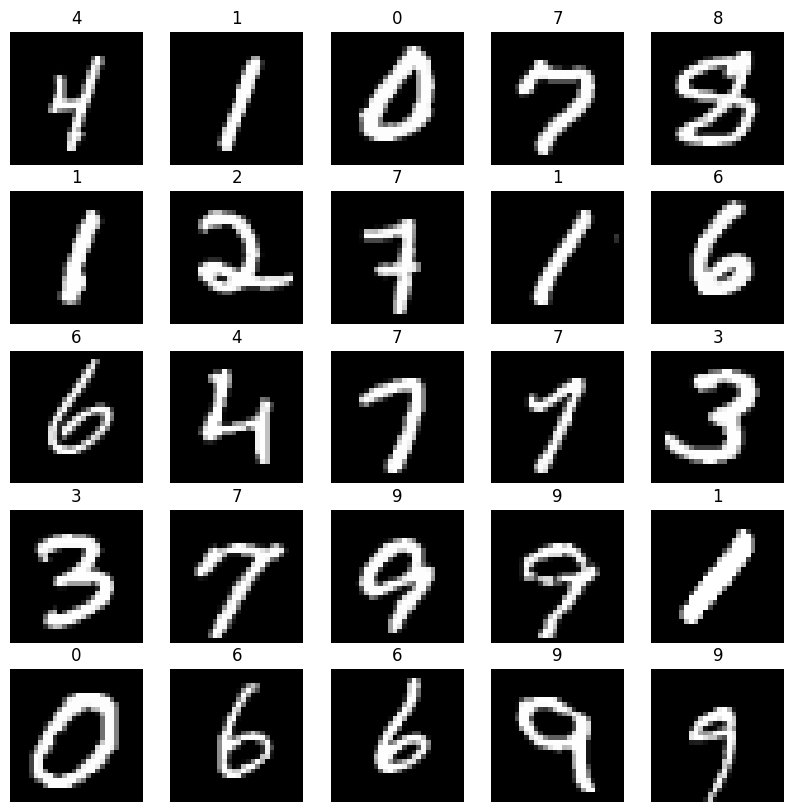

"import matplotlib.pyplot as plt\n\n# Plot a batch of images\nplt.figure(figsize=(10, 10))\nfor i in range(25):\n    plt.subplot(5, 5, i+1)\n    plt.imshow(X[i], cmap='gray')\n    plt.title(Y[i])\n    plt.axis('off')\nplt.show()"

In [5]:
query = """

- Plot a batch of images (X) from this dataset, with their own labels (Y).

"""
assistant.run_code(query, _vars=vars())

In [6]:
query = """

- Create X norm by normalizing X.

"""
assistant.run_code(query, _vars=vars())

'import numpy as np\n\nX_norm = (X - np.mean(X)) / np.std(X)'

In [7]:
query = """

- Make an image classifier with keras, train it on (X, Y) and evaluate it.

"""
assistant.run_code(query, _vars=vars())

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 2.1282 - accuracy: 0.8486
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3700 - accuracy: 0.9102
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.9276
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2495 - accuracy: 0.9378
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2258 - accuracy: 0.9428
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2205 - accuracy: 0.9458
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2020 - accuracy: 0.9510
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1982 - accuracy: 0.9517
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1909 - accuracy: 0.9545
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.18

"import tensorflow as tf\nfrom tensorflow import keras\n\n# Define the model architecture\nmodel = keras.Sequential([\n    keras.layers.Flatten(input_shape=(28, 28)),\n    keras.layers.Dense(128, activation='relu'),\n    keras.layers.Dense(10, activation='softmax')\n])\n\n# Compile the model\nmodel.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\n\n# Train the model\nmodel.fit(X, Y, epochs=10)\n\n# Evaluate the model\ntest_loss, test_acc = model.evaluate(X, Y)\nprint('Test accuracy:', test_acc)"

------ Error in code execution ------
Error: name 'batch_size' is not defined
Code: import matplotlib.pyplot as plt

# Get a batch of images and labels
batch_images = X[:batch_size]
batch_labels = Y[:batch_size]

# Get the predicted labels for the batch
predicted_labels = model.predict_classes(batch_images)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=batch_size//2, figsize=(12, 6))

# Iterate over the subplots and plot the images with labels
for i, ax in enumerate(axes.flat):
    # Plot the image
    ax.imshow(batch_images[i], cmap='gray')
    ax.axis('off')
    
    # Set the title with the true and predicted labels
    true_label = batch_labels[i]
    predicted_label = predicted_labels[i]
    ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}')

# Show the plot
plt.tight_layout()
plt.show() 
 

------ Error in code execution ------
Error: 'Sequential' object has no attribute 'predict_classes'
Code: import matplotlib.pyplot as plt

#

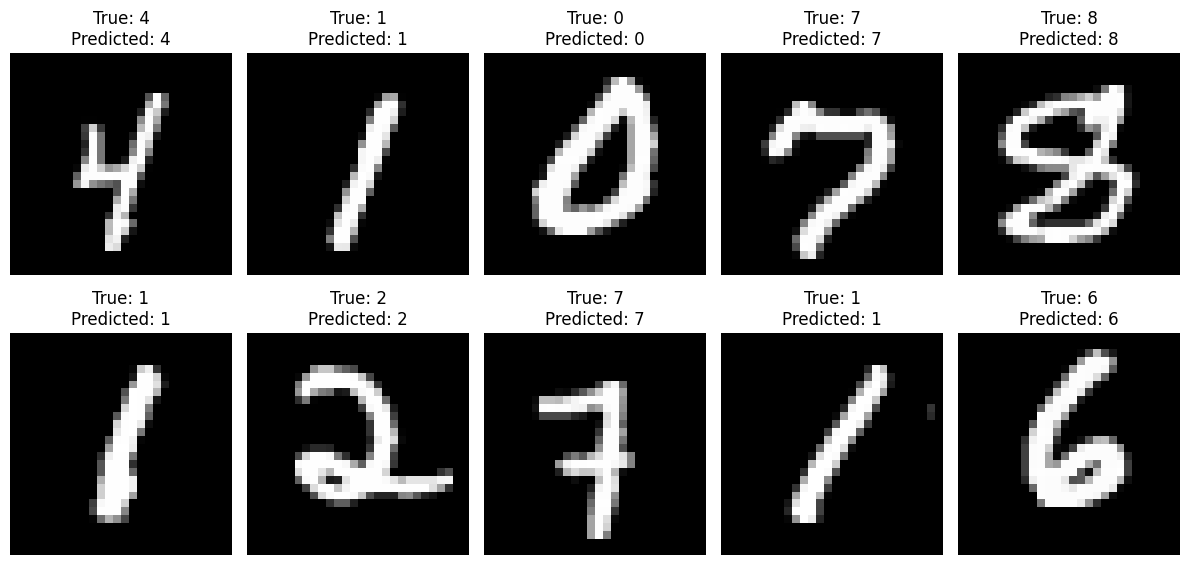

"import numpy as np\n\n# Define the batch size\nbatch_size = 10\n\n# Get a batch of images and labels\nbatch_images = X[:batch_size]\nbatch_labels = Y[:batch_size]\n\n# Get the predicted labels for the batch\npredicted_labels = np.argmax(model.predict(batch_images), axis=1)\n\n# Create a figure with a grid of subplots\nfig, axes = plt.subplots(nrows=2, ncols=batch_size//2, figsize=(12, 6))\n\n# Iterate over the subplots and plot the images with labels\nfor i, ax in enumerate(axes.flat):\n    # Plot the image\n    ax.imshow(batch_images[i], cmap='gray')\n    ax.axis('off')\n    \n    # Set the title with the true and predicted labels\n    true_label = batch_labels[i]\n    predicted_label = predicted_labels[i]\n    ax.set_title(f'True: {true_label}\\nPredicted: {predicted_label}')\n\n# Show the plot\nplt.tight_layout()\nplt.show()"

In [8]:
query = """

- Show a batch of classified images, displaying True and Predicted labels.

"""
assistant.run_code(query, _vars=vars())